# Translation Invariant Artificial Neural Network

An important performance issue of an Artificial Neural Network (ANN) is to consider whether its predictions remain unchanged, or invariant, under one or more transformations of the input data. 

In this notebook we will investigate the translation invariance property of a Multi-Layer Perceptron (MLP). We will see that generally a **MLP is not invariant to the translation of the images** that are used to train it.

Then, we will attempt to make it translation invariant by training it with an augmented dataset that is created by shifting the original images along x-y axes.

For testing the MLP model we will use an **augmented test dataset** that contains images that are altered by translation of the original images. 

From the training dataset, a test subset will be separated. This is a non-augmented test subset. Unlike the augmented test set, this test subset does not contain any augmented images.


We will perform the following tasks.
- Task 1: Train a MLP with training data (non-augmented) and evaluate its performance on both the non-augmented and augmented test subsets. 

- Task 2: Augment the training data by adding images after applying some translation along x-y axes.

- Task 3: Train a MLP model by using the augmented training data and evaluate its performance on both the non-augmented and augmented test subsets. 


In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import copy 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

from scipy.ndimage.interpolation import shift, rotate
from scipy.ndimage import gaussian_filter


from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Non-Augmented Data Matrix (X) and the Label Vector (y)


We will use the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

There are 70,000 images. Each image is 28x28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

Thus, each image has 784 features. 

First load the data from a local folder (obtain it from Canvas) or load it directly from cloud using Scikit-Learn.

In [2]:
# Load the data from the local folder "data"
mnist = loadmat('data/mnist-original.mat')

#Create the data Matrix X and the target vector y
X = mnist["data"].T.astype('float64')
y = mnist["label"][0].astype('int64')

# Load data using Scikit-Learn
# mnist = fetch_openml('mnist_784', cache=False)

# X = mnist["data"].astype('float64')
# y = mnist["target"].astype('int64')


print("\nNo. of Samples: ", X.shape)
print("No. of Labels: ", y.shape)


No. of Samples:  (70000, 784)
No. of Labels:  (70000,)

X type:  float64
y type:  int64


## Split Data Into Training and Test Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (56000, 784)
X_test:  (14000, 784)


## Data Augmentation

We define the following function for augmenting the data by shifting the image along x-y coordinates.

In [4]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

## Demo: How to Augment Data by Shifting

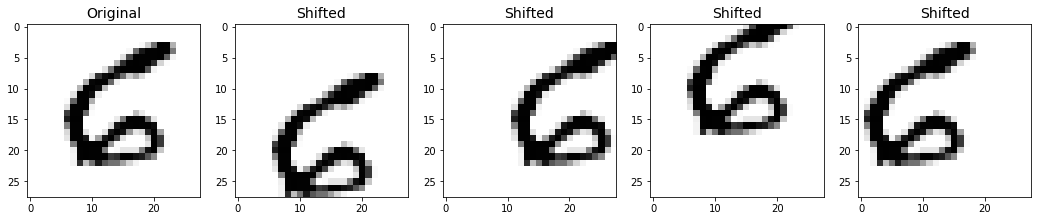

In [5]:
image = X_train[1000]
shifted_image_1 = shift_image(image, 0, 5)
shifted_image_2 = shift_image(image, 5, 0)
shifted_image_3 = shift_image(image, 0, -5)
shifted_image_4 = shift_image(image, -5, 0)


plt.figure(figsize=(18,6))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_3.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Shifted", fontsize=14)
plt.imshow(shifted_image_4.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

## Load Augmented Test Data 

Load the following augmented test data file. It contains images that are altered by some translation of the original images along x-y axes.

In [8]:
augmented_test_data = loadmat('data/Test_Data_Shifted.mat')

X_test_augmented = augmented_test_data["X_test"].astype('float64')
y_test_augmented = augmented_test_data["y_test"][0].astype('int64')

## Scale the Data

In [9]:
# Create a deep copy of the training data for using it later for augmentation
X_train_original = copy.deepcopy(X_train)


X_train /= 255.0
X_test /= 255.0
X_test_augmented /= 255.0

## Task 1: Train a MLP Model using Non-Augmened Training Data 

In [10]:
%%time
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, alpha=0.01,
                    solver='adam', verbose=True, tol=1e-5, random_state=1, 
                    learning_rate='constant', learning_rate_init=0.001, activation='relu',
                    early_stopping=True, n_iter_no_change=10)


# Train the model using the non-augmented training data
mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.40886675
Validation score: 0.932679
Iteration 2, loss = 0.19419106
Validation score: 0.951429
Iteration 3, loss = 0.14385625
Validation score: 0.960000
Iteration 4, loss = 0.11466252
Validation score: 0.964464
Iteration 5, loss = 0.09499003
Validation score: 0.965714
Iteration 6, loss = 0.08248333
Validation score: 0.970357
Iteration 7, loss = 0.07131126
Validation score: 0.970179
Iteration 8, loss = 0.06324839
Validation score: 0.972500
Iteration 9, loss = 0.05644300
Validation score: 0.973929
Iteration 10, loss = 0.05160096
Validation score: 0.973571
Iteration 11, loss = 0.04799070
Validation score: 0.975179
Iteration 12, loss = 0.04425474
Validation score: 0.976786
Iteration 13, loss = 0.04104076
Validation score: 0.975893
Iteration 14, loss = 0.03763602
Validation score: 0.976786
Iteration 15, loss = 0.03603052
Validation score: 0.977321
Iteration 16, loss = 0.03457569
Validation score: 0.976786
Iteration 17, loss = 0.03249957
Validation score: 0.977143
Iterat

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)

## Task 1: Evaluate the Model using Test Data (Non-Augmented & Augmented) 

In [11]:
y_train_predicted = mlp_clf.predict(X_train)

train_accuracy_mlp = np.mean(y_train_predicted == y_train)

print("\nTraining Accuracy (non-augmented): ", train_accuracy_mlp)


y_test_predicted = mlp_clf.predict(X_test)

test_accuracy_mlp = np.mean(y_test_predicted == y_test)

print("\nNon-Augmented Test Accuracy (based on non-augmented model): ", test_accuracy_mlp)


y_test_predicted_augmented = mlp_clf.predict(X_test_augmented)

augmented_test_accuracy_mlp_nonaugmentedmodel = np.mean(y_test_predicted_augmented == y_test_augmented)

print("\nAugmented Test Accuracy (based on non-augmented model): ", augmented_test_accuracy_mlp_nonaugmentedmodel)


Training Accuracy (non-augmented):  0.9981428571428571

Non-Augmented Test Accuracy (based on non-augmented model):  0.9808571428571429

Augmented Test Accuracy (based on non-augmented model):  0.6722142857142858


## Observation: 

The augmented test data accuracy is be **much smaller** than the accuracy of the original (non-augmented) test data. 

This indicates the fact that **MLP is not invariant to the translation of images** used for its training.

## Task 2: Augment the Training Data 

In [13]:
%%time

X_train_augmented = [image for image in X_train_original]
y_train_augmented = [label for label in y_train]


# Augmentation by shifting
for dx, dy in ((3, 0), (-3, 0), (0, 3), (0, -3)):
    for image, label in zip(X_train_original, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)


X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print("X_train_augmented Shape: ", X_train_augmented.shape)

X_train_augmented Shape:  (280000, 784)
Wall time: 24.6 s


## Randomize the Augmented Data

In [14]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

## Scale the Augmented Training Data

In [15]:
X_train_augmented /= 255.0

## Task 4: Train a MLP Model using Augmened Training Data

In [16]:
%%time
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, alpha=0.01,
                    solver='adam', verbose=True, tol=1e-5, random_state=1, 
                    learning_rate='constant', learning_rate_init=0.001, activation='relu',
                    early_stopping=True, n_iter_no_change=10)


# Train the model using the augmented training data
mlp_clf.fit(X_train_augmented, y_train_augmented)

Iteration 1, loss = 0.35281363
Validation score: 0.954714
Iteration 2, loss = 0.14998969
Validation score: 0.963429
Iteration 3, loss = 0.12264136
Validation score: 0.966821
Iteration 4, loss = 0.10848869
Validation score: 0.970107
Iteration 5, loss = 0.09977907
Validation score: 0.972071
Iteration 6, loss = 0.09360825
Validation score: 0.970679
Iteration 7, loss = 0.08912252
Validation score: 0.971821
Iteration 8, loss = 0.08522504
Validation score: 0.972786
Iteration 9, loss = 0.08233197
Validation score: 0.973464
Iteration 10, loss = 0.08031772
Validation score: 0.972107
Iteration 11, loss = 0.07854861
Validation score: 0.974571
Iteration 12, loss = 0.07605697
Validation score: 0.975286
Iteration 13, loss = 0.07455568
Validation score: 0.974464
Iteration 14, loss = 0.07282965
Validation score: 0.974429
Iteration 15, loss = 0.07216377
Validation score: 0.974464
Iteration 16, loss = 0.07132250
Validation score: 0.975107
Iteration 17, loss = 0.07021079
Validation score: 0.974786
Iterat

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)

## Task 3: Evaluate the Model using Test Data (Non-Augmented & Augmented) 

In [17]:
y_train_predicted = mlp_clf.predict(X_train_augmented)

train_accuracy_mlp_augmented = np.mean(y_train_predicted == y_train_augmented)

print("\nTraining Accuracy (based on augmented model): ", train_accuracy_mlp_augmented )


y_test_predicted = mlp_clf.predict(X_test)

nonaugmented_test_accuracy_mlp_augmentedmodel = np.mean(y_test_predicted == y_test)

print("\nNon-Augmented Test Accuracy (based on augmented model): ", nonaugmented_test_accuracy_mlp_augmentedmodel)


y_test_predicted_augmented = mlp_clf.predict(X_test_augmented)

augmented_test_accuracy_mlp_augmentedmodel = np.mean(y_test_predicted_augmented == y_test_augmented)

print("\nAugmented Test Accuracy (based on augmented model): ", augmented_test_accuracy_mlp_augmentedmodel)


Training Accuracy (based on augmented model):  0.9927571428571429

Non-Augmented Test Accuracy (based on augmented model):  0.9812142857142857

Augmented Test Accuracy (based on augmented model):  0.9763714285714286


## Comparison: Augmented Model vs. Non-Augmented Model

In [18]:
print("\nAugmented Test Accuracy (based on non-augmented model): ", augmented_test_accuracy_mlp_nonaugmentedmodel)

print("\nAugmented Test Accuracy (based on augmented model): ", augmented_test_accuracy_mlp_augmentedmodel)


Augmented Test Accuracy (based on non-augmented model):  0.6722142857142858

Augmented Test Accuracy (based on augmented model):  0.9763714285714286


## Observation

We observe that after training the MLP model by using the augmented data we could **significantly improve the accuracy** on the augmented test dataset. 

Now the MLP is **invariant to translation of images**.

However, for this improvement we needed to increase the training dataset (from 56,000 to 280,000), which increased the training time (4 min to 13 min).

In the next notebook we will see that translation invariant property could be built into the sturcture of the Artificial Neural Network (ANN). We will implement such an ANN by building a **Convolutional Neural Network (CNN)**.